In [1]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd
from pylab import figure, axes, pie, title, show
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import pylab

In [2]:
cd C:\Users\Charles\Desktop\AI Cough Detection\Cough

C:\users\charles\desktop\AI Cough Detection\cough


1    140
Name: label, dtype: int64

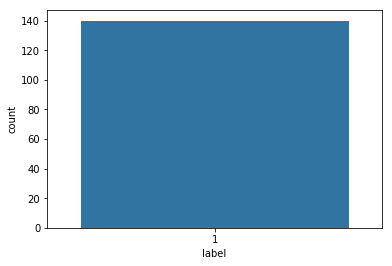

In [19]:
# Class Distribution
df_data = pd.read_csv('cough2_drive.csv')
g = sns.countplot(df_data['label'])
df_data['label'].value_counts()

In [23]:
# define directories
base_dir = "./"
esc_dir = os.path.join(base_dir, "cough")
meta_file = os.path.join(base_dir, "cough2_drive.csv")
audio_dir = os.path.join(base_dir, "cough2_drrive/")

In [24]:
# load metadata
meta_data = pd.read_csv(meta_file)
meta_data

,Name,label
0,108017__erocshadow__cough.wav,1
1,132601__carlossolano019__cough.wav,1
2,13799__pfly__babycough01.wav,1
3,142603__loisgwenllian__cough2.wav,1
4,142604__loisgwenllian__cough1.wav,1
5,144254__dwoboyle__human-man-coughing.wav,1
6,145359__kleanthism__kleaudio-coughdouble-msst.wav,1
7,145487__bmoreno__0005-cough.wav,1
8,146873__tgfcoder__male-sick-cough.wav,1
9,148212__espaitecnologic__tos-aeiraval-petits.wav,1


In [25]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

In [26]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [27]:
# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

In [28]:
#display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    #plt.colorbar()
    plt.show()
    #plt.axis('off')

In [29]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [30]:
# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [32]:
# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [13]:
!git init
!git add .
!git commit -m "Initial commit"
!git remote add origin https://github.com/CharlesNJohn/Cough.git
!git push -f origin master

Reinitialized existing Git repository in C:/Users/Charles/Desktop/AI Cough Detection/cough/.git/


The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master 785d162] Initial commit
 16 files changed, 1433 insertions(+), 1088 deletions(-)
 rewrite Cough-Copy1.ipynb (89%)
 create mode 100644 images/1-45641-A-27.png
 create mode 100644 images/1-45645-A-31.png
 create mode 100644 images/1-46040-A-14.png
 create mode 100644 images/1-46272-A-12.png
 create mode 100644 images/1-46274-A-18.png
 create mode 100644 images/1-46353-A-49.png
 create mode 100644 images/1-46744-A-36.png
 create mode 100644 images/1-46938-A-7.png
 create mode 100644 images/1-46938-B-7.png
 create mode 100644 images/1-47250-A-41.png
 create mode 100644 images/1-47250-B-41.png
 create mode 100644 images/1-47273-A-21.png
 create mode 100644 images/1-47274-A-21.png
 create mode 100644 images/1-47709-A-16.png


fatal: remote origin already exists.
To https://github.com/CharlesNJohn/Cough.git
   9740314..785d162  master -> master


In [14]:
!git remote -v

origin	https://github.com/CharlesNJohn/Cough.git (fetch)
origin	https://github.com/CharlesNJohn/Cough.git (push)


In [15]:
!git push origin master

Everything up-to-date


In [16]:
!git commit -m "updated"

On branch master
Changes not staged for commit:
	modified:   Cough-Copy1.ipynb

no changes added to commit


In [36]:
for filename in os.listdir(audio_dir):
    for i in range(0, 140):

            x, fs = load_wave_data(audio_dir, meta_data.loc[i,"filename"])
            melsp = calculate_melsp(x)
            librosa.display.specshow(melsp, sr=fs)
            
            label_sm='SM'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_sm_renamed=os.path.splitext(label_sm)[0]
            plt.axis('off')
            plt.savefig('images/cough2_drive/'+label_sm_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()
            #show_melsp(melsp, fs)
            
            
            
            '''fig, ax = plt.subplots( nrows=1, ncols=1 ) # create figure & 1 axis
            ax.plot([0,1,2], [10,20,3])
            fig.savefig('o.png') # save the figure to file
            plt.close(fig) # close the figure'''
            
            x_wn = add_white_noise(x)
            melsp = calculate_melsp(x_wn)
            librosa.display.specshow(melsp, sr=fs)
            
            #show_melsp(melsp, fs)
            label_wn='WN'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_wn_renamed=os.path.splitext(label_wn)[0]
            plt.savefig('images/cough2_drive/'+label_wn_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()

            
            x_ss = shift_sound(x)
            melsp = calculate_melsp(x_ss)
            librosa.display.specshow(melsp, sr=fs)
            
            label_ss='SS'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_ss_renamed=os.path.splitext(label_ss)[0]
            plt.savefig('images/cough2_drive/'+label_ss_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()

            x_st = stretch_sound(x)
            melsp = calculate_melsp(x_st)
            librosa.display.specshow(melsp, sr=fs)
            
            label_st='ST'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_st_renamed=os.path.splitext(label_st)[0]
            plt.savefig('images/cough2_drive/'+label_st_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()
            
            print(i)

KeyError: 'filename'

In [ ]:
!pwd